In [38]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
import seaborn as sns

## Reading & Normalizing Data

In [2]:

def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf



def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)



In [3]:
fordDf = readStock("Ford.csv")
gmDf= readStock("GM.csv")
mahindraDf= readStock("M&M.NS.csv")
marutiDf= readStock("MARUTI.NS.csv")
mercedesDf= readStock("MARUTI.NS.csv")
stlaDf= readStock("STLA.csv")
tataMotorsDf= readStock("TATAMOTORS.csv")
toyotaDf= readStock("Toyota.csv")
teslaDf = readStock("TSLA.csv")
vow3Df= readStock("VOW3.DE.csv")

In [45]:
fordDf

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
...,...,...,...,...
2524,2023-01-11,0.412121,0.437531,0.147062
2525,2023-01-12,0.424709,0.448310,0.167429
2526,2023-01-13,0.391608,0.416952,0.292887
2527,2023-01-17,0.393007,0.414993,0.176168


## Concating the Companies 

In [6]:
AutoMobile_df = pd.concat([fordDf,gmDf,mahindraDf,mercedesDf,stlaDf,
                          tataMotorsDf,toyotaDf,teslaDf,vow3Df])

In [7]:
AutoMobile_df.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


In [8]:
AutoMobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22688 entries, 0 to 2549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22688 non-null  datetime64[ns]
 1   High    22684 non-null  float64       
 2   Low     22684 non-null  float64       
 3   Volume  22684 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 886.2 KB


In [9]:
AutoMobile_df.describe()

,High,Low,Volume
count,22684.000000,22684.000000,22684.000000
mean,0.384269,0.402653,0.107928
std,0.229896,0.231731,0.092069
min,0.000000,0.000000,0.000000
25%,0.215771,0.235171,0.050057
50%,0.360101,0.393718,0.083877
75%,0.537641,0.556933,0.137678
max,1.000000,1.000000,1.000000


In [10]:
AutoMobile_df

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
...,...,...,...,...
2545,2023-01-12,0.217445,0.283246,0.082273
2546,2023-01-13,0.209222,0.260798,0.167468
2547,2023-01-16,0.199941,0.266557,0.060403
2548,2023-01-17,0.201703,0.257272,0.102326


## Average per Day of Data using groupby

In [11]:
df_Auto = AutoMobile_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

In [12]:
df_Auto

,High,Low,Volume
Date,,,
2013-01-01,0.102932,0.116431,0.032780
2013-01-02,0.213810,0.233270,0.122787
2013-01-03,0.216418,0.234956,0.126092
2013-01-04,0.215005,0.238389,0.094290
2013-01-07,0.213552,0.235734,0.076368
...,...,...,...
2023-01-12,0.510098,0.527184,0.107744
2023-01-13,0.493667,0.511290,0.137713
2023-01-16,0.664934,0.693683,0.044766


In [13]:
df_Auto.describe()

,High,Low,Volume
count,2608.000000,2608.000000,2608.000000
mean,0.385110,0.403638,0.107257
std,0.128876,0.127422,0.039404
min,0.075668,0.087173,0.000000
25%,0.302511,0.321810,0.081571
50%,0.349205,0.369837,0.099078
75%,0.465608,0.485888,0.124529
max,0.860334,0.859226,0.566253


## Ploting Graph Volume trading verse Date

(0.0, 0.7)

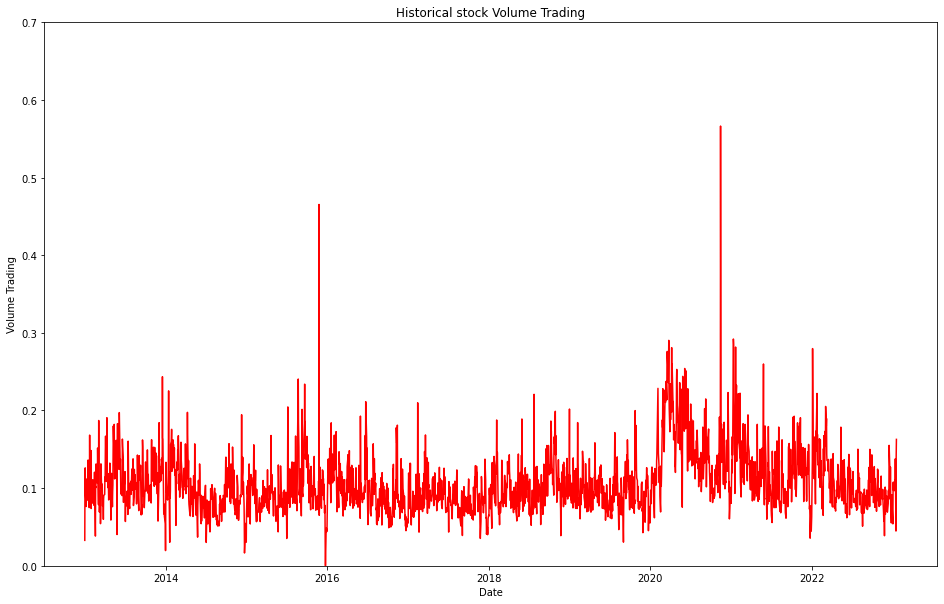

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.Volume, color='red', linestyle= '-')
ax.set(title = "Historical stock Volume Trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 0.7)




In [15]:
df_Auto.to_csv('Scaled_Data_Averaged.csv', encoding='utf-8')

In [16]:
Sorted_df = df_Auto.sort_values(by=['Date'])
Sorted_df

,High,Low,Volume
Date,,,
2013-01-01,0.102932,0.116431,0.032780
2013-01-02,0.213810,0.233270,0.122787
2013-01-03,0.216418,0.234956,0.126092
2013-01-04,0.215005,0.238389,0.094290
2013-01-07,0.213552,0.235734,0.076368
...,...,...,...
2023-01-12,0.510098,0.527184,0.107744
2023-01-13,0.493667,0.511290,0.137713
2023-01-16,0.664934,0.693683,0.044766


(0.0, 1.0)

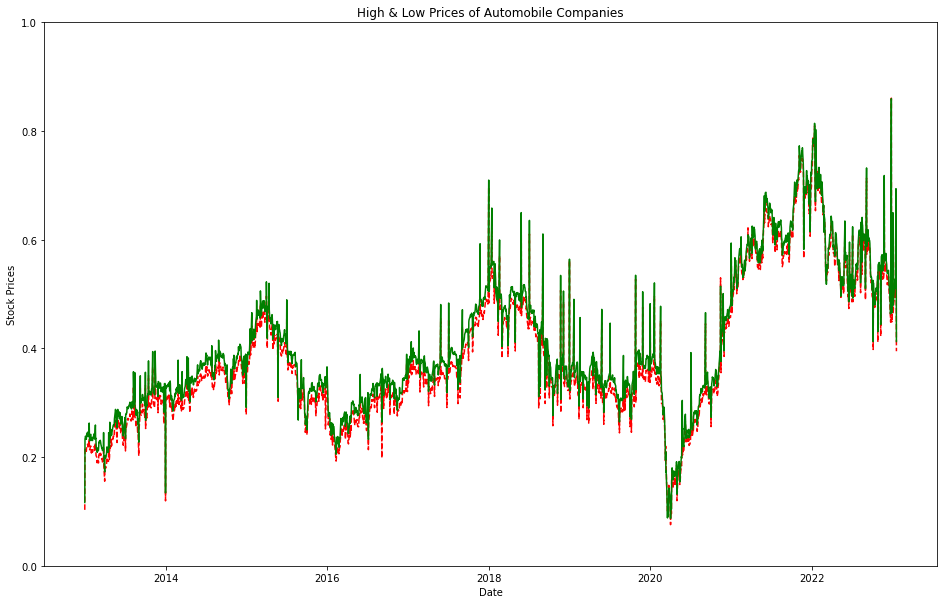

In [49]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.High, color='red', linestyle= '--')
ax.plot(Sorted_df.Low, color='green')
##ax.plot(Sorted_df.Volume, color = 'grey')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 1)



(0.0, 1.0)

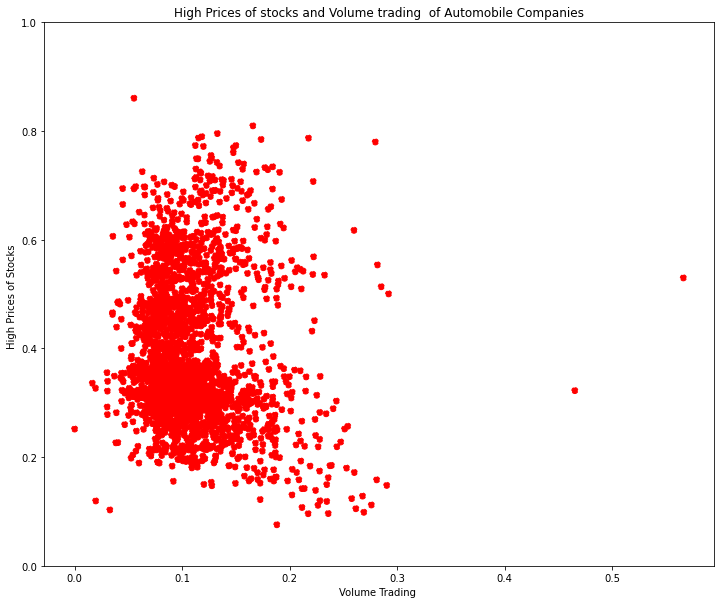

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(Sorted_df.Volume,Sorted_df.High, color='red', linestyle= '--')
#ax.plot(Sorted_df.Volume , color='green')
##ax.plot(Sorted_df.Volume, color = 'grey')
ax.set(title = "High Prices of stocks and Volume trading  of Automobile Companies",
       xlabel = "Volume Trading ",
       ylabel = "High Prices of Stocks ")


plt.ylim(0, 1)



## MultiLinear Regression Machine Learning Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
train_df = Sorted_df[(Sorted_df.index < '2022-01-01')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = Sorted_df[(Sorted_df.index >= '2022-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2336,)
X train Shape: (2336, 2)

TEST
Y test Shape: (272,)
X test Shape: (272, 2)


In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

## Model Validation

In [23]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.21941495467520655
Coefficients: [ 4.77763407 -4.82909055]


### Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:
### y=0.2162+4.2442X<sub>1</sub>-4.3192X<sub>2</sub>

In [24]:
r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))

Model R2: 0.47896504516124827


In [25]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [26]:

X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1072.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:20:56   Log-Likelihood:                 4956.8
No. Observations:                2336   AIC:                            -9908.
Df Residuals:                    2333   BIC:                            -9890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2194      0.003     74.333      0.0

In [27]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.47896504516124827


### Accuracy Assesment
### R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.442 which means 44.2% of our dependent variable can be explained using our independent variables.

## Make Future Predictions 

In [28]:
print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))


TEST
Y test Shape: (272,)
X test Shape: (272, 2)


In [29]:
Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))

prediction shape: (272,)


In [30]:
Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})
Sorted_pred_df =Pred_df.sort_values(by=['Date'])
Sorted_pred_df

,Prediction,Actual
Date,,
2022-01-03,0.120745,0.134807
2022-01-04,0.224776,0.279721
2022-01-05,0.191015,0.217550
2022-01-06,0.146947,0.150031
2022-01-07,0.115807,0.119759
...,...,...
2023-01-12,0.110655,0.107744
2023-01-13,0.108910,0.137713
2023-01-16,0.046371,0.044766


(0.0, 0.2)

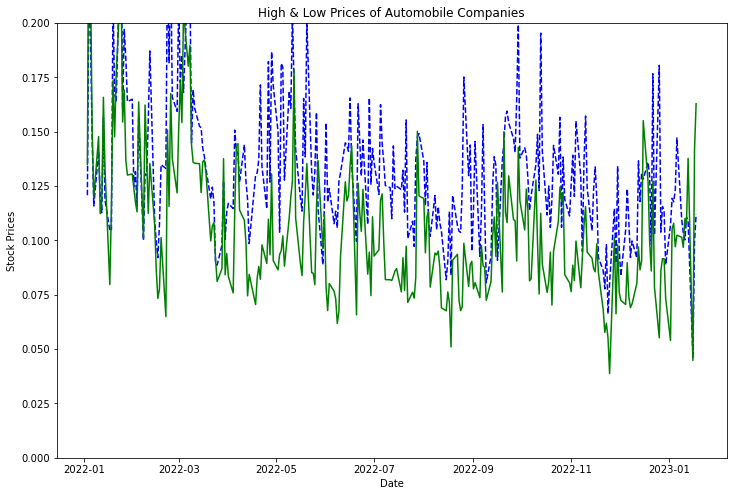

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Sorted_pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 0.2)



(0.0, 0.2)

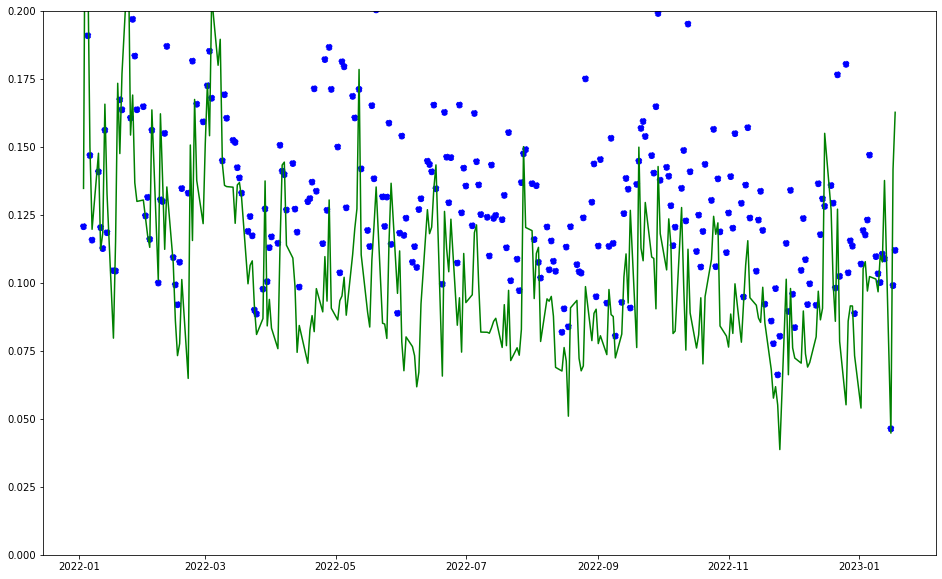

In [32]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Sorted_pred_df.index,Sorted_pred_df.Prediction,color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
plt.ylim(0, 0.2)

In [33]:
r2 = model.score(X_test, y_test)

print("Prediction score: " + str(r2))

Prediction score: -0.36106993385622155


## 3D representation of the Multilinear Machine Learning Model

In [36]:
# Prepare data
X = df_Auto[['High', 'Low']].values.reshape(-1,2)
Y = df_Auto['Volume']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y



xx_pred = np.linspace(0, 1,20)  # range of High  values

yy_pred = np.linspace(0,1,20)  # range of Low values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



/Users/shreya/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shreya/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


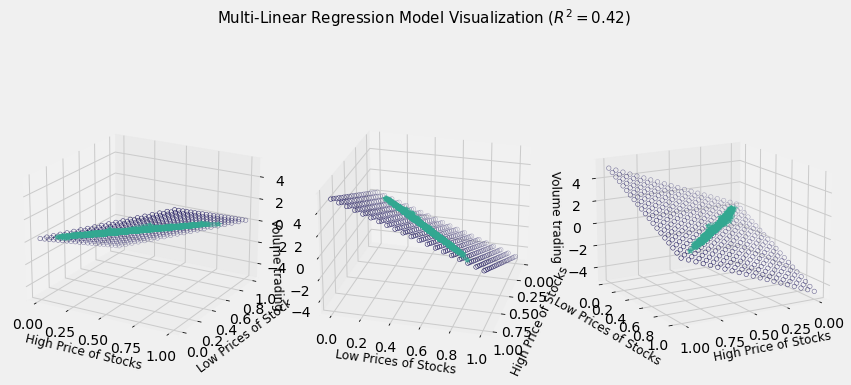

In [837]:
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='#32a891', zorder=15, linestyle='-', marker='*', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#150e57')
    ax.set_xlabel('High Price of Stocks', fontsize=12)
    ax.set_ylabel('Low Prices of Stocks', fontsize=12)
    ax.set_zlabel('Volume trading ', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

    


ax1.view_init(elev=20, azim=-60)
ax2.view_init(elev=25, azim=15)
ax3.view_init(elev=15, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()




## Corelation Matrix of Features i.e High And Low Prices of Stocks 

Pearson correlation coefficient matrix of each variables:
           Volume      High       Low
Volume  1.000000 -0.068289 -0.074008
High   -0.068289  1.000000  0.993226
Low    -0.074008  0.993226  1.000000


/var/folders/6t/j_pqygk907b8ckg3y8nwwydm0000gp/T/ipykernel_32595/3119330110.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


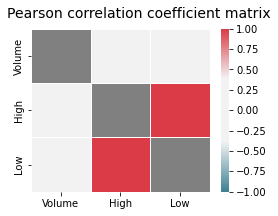

In [44]:
corr = AutoMobile_df[['Volume', 'High', 'Low']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()